<a href="https://colab.research.google.com/github/MusaBrown/test-colab/blob/main/AnomolyDetectionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

from google.colab import files
uploaded = files.upload()

# Read the uploaded CSV file into a DataFrame
data = pd.read_csv(next(iter(uploaded)))

# Assume 'anomaly' column indicates anomalies (1 for anomaly, 0 for normal)
X = data.drop('anomaly', axis=1)
y = data['anomaly']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of training and testing sets
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Saving anomaly_detection_data.csv to anomaly_detection_data.csv
Training set size: 800
Testing set size: 200


In [ ]:
print(data)

                           time       location  amount form_of_transaction  \
0    2024-03-30 03:15:12.611901    Los Angeles   82.24            transfer   
1    2024-03-31 02:50:12.611925    Los Angeles   69.31    internet_banking   
2    2024-03-28 06:33:12.611931          Miami  445.21            transfer   
3    2024-03-28 14:47:12.611935  San Francisco  489.41    internet_banking   
4    2024-03-28 20:42:12.611939    Los Angeles  211.98          swipe_card   
..                          ...            ...     ...                 ...   
995  2024-03-25 02:57:12.615806  San Francisco  898.93                 tap   
996  2024-03-25 05:16:12.615809    Los Angeles  955.12    internet_banking   
997  2024-03-27 02:39:12.615813  San Francisco  499.94    internet_banking   
998  2024-03-26 05:19:12.615816        Chicago  121.62    internet_banking   
999  2024-03-27 17:47:12.615820  San Francisco  504.59    internet_banking   

     type_of_card    merchant transaction_category  customer_ag

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Convert categorical features to numerical using LabelEncoder
label_encoder = LabelEncoder()
X_train_encoded = X_train.copy()  # Make a copy of X_train to avoid modifying the original data
for column in X_train.columns:
    if X_train[column].dtype == 'object':  # Check if the column contains strings
        X_train_encoded[column] = label_encoder.fit_transform(X_train[column])

# Train the Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_train_encoded)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of X_test to avoid modifying the original data
X_test_encoded = X_test.copy()

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features in the test data
for column in X_test.columns:
    if X_test[column].dtype == 'object':  # Check if the column contains strings
        X_test_encoded[column] = label_encoder.fit_transform(X_test[column])

# Make predictions using the trained model
y_pred = model.predict(X_test_encoded)

# Convert predictions to binary labels (0 for inliers, 1 for outliers)
y_pred_binary = [1 if x == -1 else 0 for x in y_pred]

# Display predictions
print("Predictions on the test set:")
print(y_pred_binary)


Predictions on the test set:
[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]


In [ ]:
from sklearn.metrics import classification_report

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))


Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.86      0.64        98
           1       0.59      0.20      0.29       102

    accuracy                           0.52       200
   macro avg       0.55      0.53      0.47       200
weighted avg       0.55      0.52      0.46       200



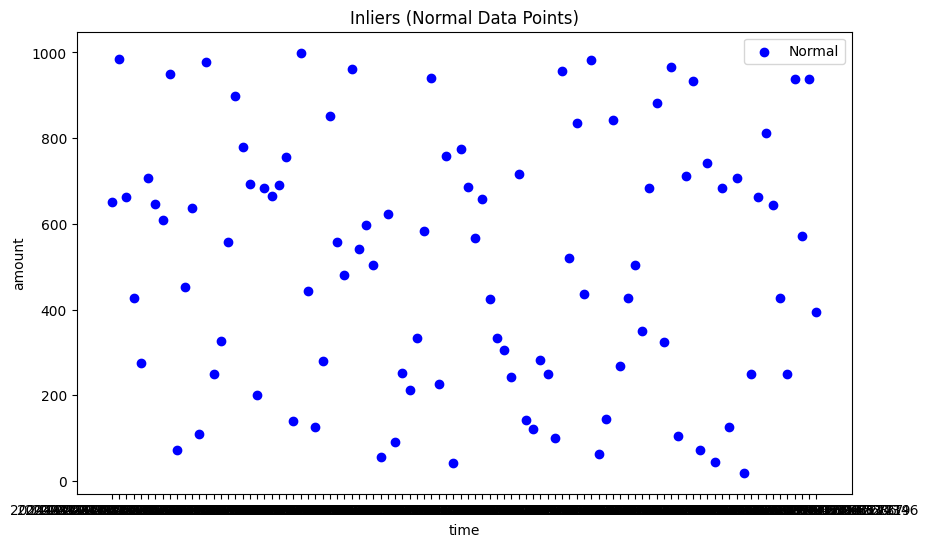

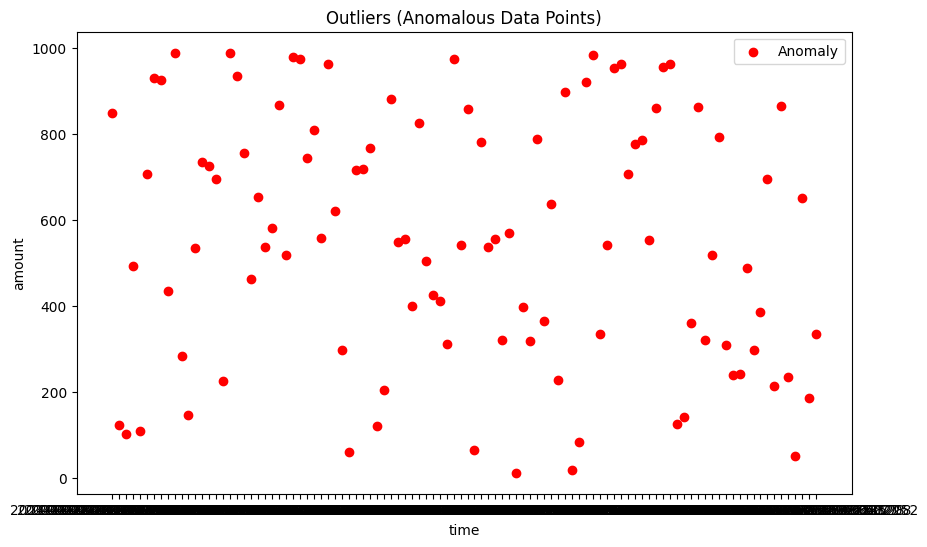

In [ ]:
import matplotlib.pyplot as plt

# Choose features to plot against the predicted labels
feature1 = 'time'  # Replace 'time' with the actual name of your feature
feature2 = 'amount'  # Replace 'amount' with the actual name of your feature

# Create a scatter plot for inliers (normal data points)
plt.figure(figsize=(10, 6))
plt.scatter(X_test.loc[y_test == 0, feature1], X_test.loc[y_test == 0, feature2], color='blue', label='Normal')
plt.title('Inliers (Normal Data Points)')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.show()

# Create a scatter plot for outliers (anomalous data points)
plt.figure(figsize=(10, 6))
plt.scatter(X_test.loc[y_test == 1, feature1], X_test.loc[y_test == 1, feature2], color='red', label='Anomaly')
plt.title('Outliers (Anomalous Data Points)')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.show()
